In [2]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
img_src = "../DATASETS/hof/webcam20231103-2.png"

In [4]:
img_path = Path(img_src)
output_path = img_path.with_stem(img_path.stem + '-homography').with_suffix('.txt')



# Setup

In [5]:
from os import PathLike

def render_projection(src, dst, img: PathLike, points = []):
    x_min = min(dst[:,0])
    if x_min < 0:
        dst[:,0] += x_min * -1
    y_min = min(dst[:,1])
    if y_min < 0:
        dst[:,1] += y_min * -1

    dst[:,0] +=  1500
    dst[:,1] +=  600


    # print("from", src)
    # print("to", dst)

    H, status = cv2.findHomography(src,dst)
    f, axes = plt.subplots(1, 2, figsize=(16,8))

    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    for i, p in enumerate(src):
        cv2.circle(img, p, 3, (0,255,0), 0)
        cv2.putText(img, str(i), p, cv2.FONT_HERSHEY_COMPLEX, .5, (0,255,0))

    # print (H)
    dst = cv2.warpPerspective(img,H,(2500,1920))
    axes[0].imshow(img)
    axes[1].imshow(dst)

    def onclick(event):
        points.append([event.xdata,event.ydata])
    f.canvas.mpl_connect('button_press_event', onclick)

    plt.tight_layout()
    plt.show()
    # display(Image.fromarray(img).resize((600,600)), Image.fromarray(dst).resize((600,600)))
    return H

# First recording

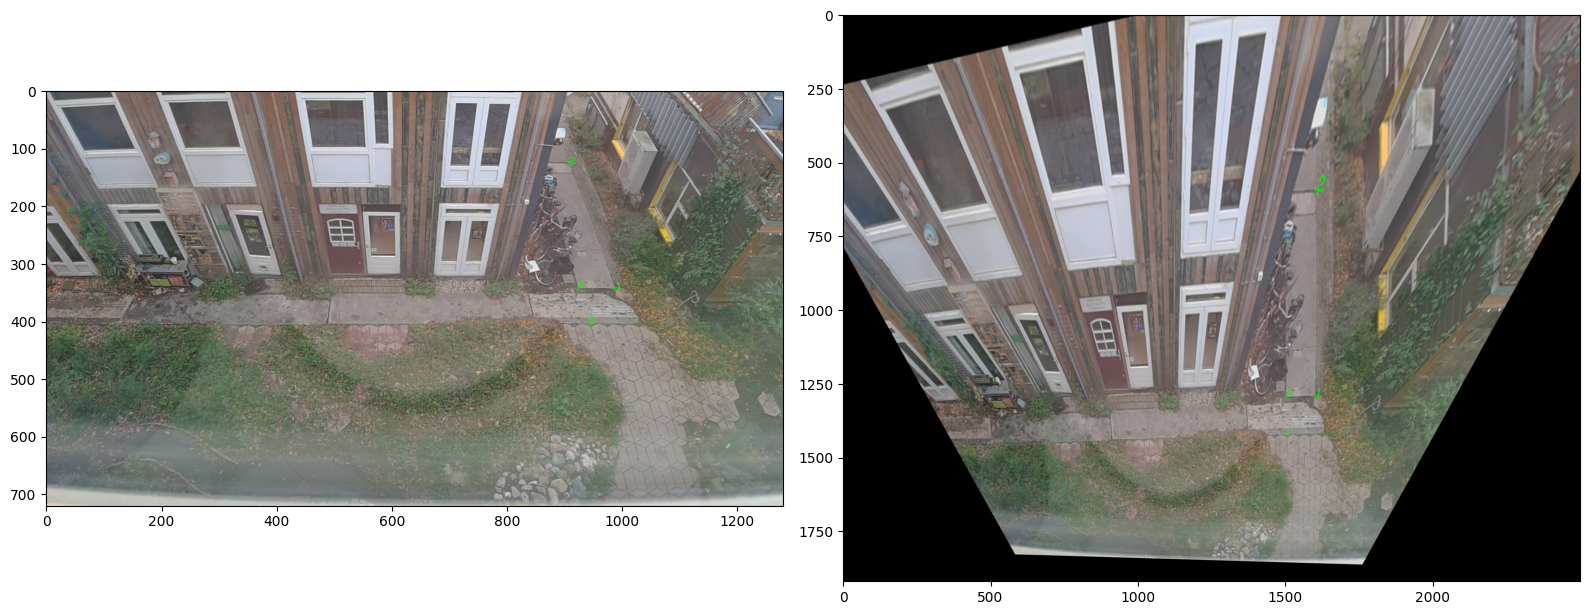

array([[ 1.71375783e+00,  2.33423256e+00, -2.69179279e+02],
       [-4.74127516e-01,  5.72635471e+00,  3.04878642e+02],
       [-2.89572527e-04,  1.97232411e-03,  1.00000000e+00]])

In [6]:

src = np.array([[924, 341],
    [988, 343],
    [908,125],
    [941, 404],])

dst = np.array([[2,0],
[100,0],
[105, -695],
[0, 130]])


render_projection(src, dst, img_path)
# cv2.imwrite("/tmp/test.jpg", dst)

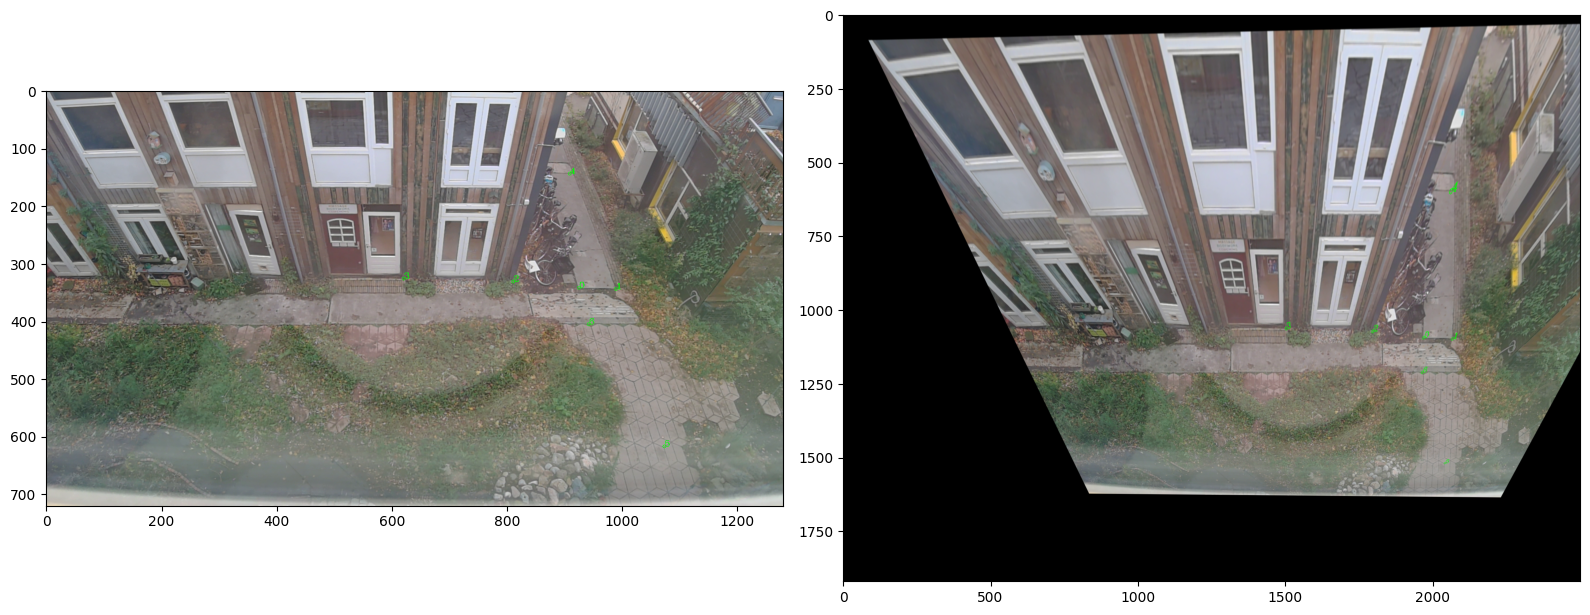

[[ 2.21499129e+00  2.34352815e+00  8.78577725e+01]
 [-5.43898062e-02  4.67568137e+00  9.00976942e+01]
 [-4.62400661e-05  1.56718752e-03  1.00000000e+00]]


In [7]:

src = np.array([[924, 341],
    [988, 343],
    [810, 330],
    [620, 325],
    [908,143],
    [1072,616],
    [941, 404],
    
    ])

dst = np.array([[0,0],
[97,0],
[-160,-33],
[-460,-33],
[105, -500],
[87, 420],
[-2, 112]
])


H = render_projection(src, dst, img_path)
print(H)
# np.savetxt(output_path, H, delimiter=",")
# cv2.imwrite("/tmp/test.jpg", dst)

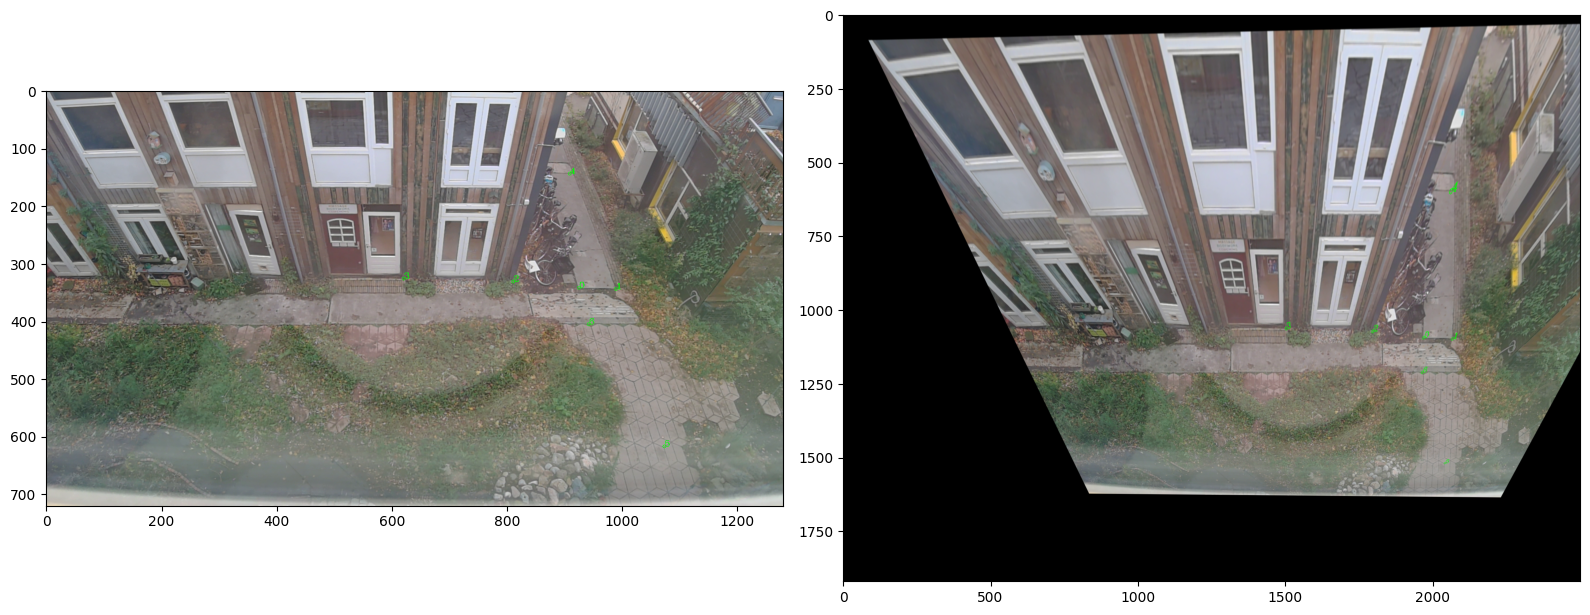

[[ 2.21499129e+00  2.34352815e+00  8.78577725e+01]
 [-5.43898062e-02  4.67568137e+00  9.00976942e+01]
 [-4.62400661e-05  1.56718752e-03  1.00000000e+00]]


In [8]:

src = np.array([[924, 341],
    [988, 343],
    [810, 330],
    [620, 325],
    [908,143],
    [1072,616],
    [941, 404],
    
    ])

dst = np.array([[0,0],
[97,0],
[-160,-33],
[-460,-33],
[105, -500],
[87, 420],
[-2, 112]
])


H = render_projection(src, dst, img_path)
print(H)
# np.savetxt(output_path, H, delimiter=",")
# cv2.imwrite("/tmp/test.jpg", dst)

# second recording

In [9]:
img_src = "../DATASETS/hof/webcam20240110.png"
img_path = Path(img_src)
output_path = img_path.with_stem(img_path.stem + '-homography').with_suffix('.txt')

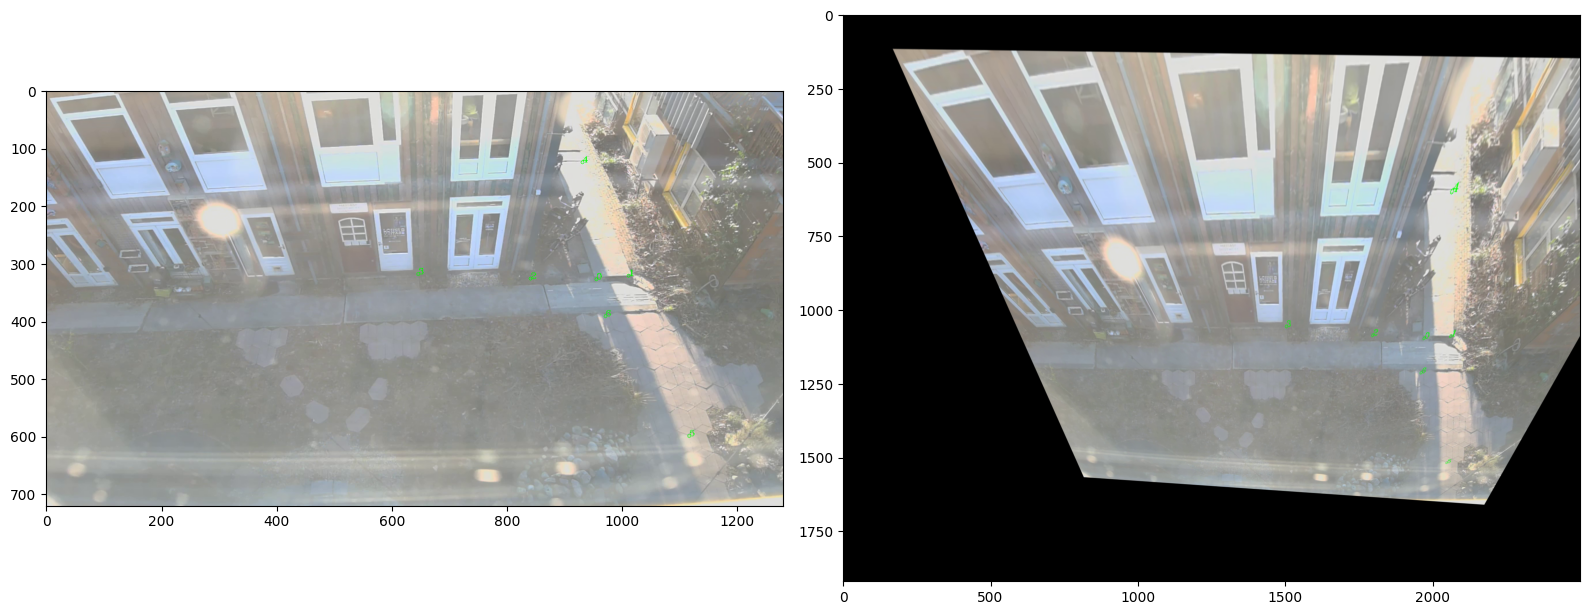

[[ 1.99303684e+00  2.07856843e+00  1.70031558e+02]
 [ 1.80069779e-02  4.28293697e+00  1.19720304e+02]
 [-7.86892465e-05  1.44778561e-03  1.00000000e+00]]


In [10]:

src = np.array([
    [954, 326], # 0
    [1010, 320], # 1
    [840, 325], # 2
    [645, 317], # 3
    [930,123], # 4
    [1115,598], # 5
    [970, 390], # 6
    ])

dst = np.array([[0,0],
[97,0],
[-160,-33],
[-460,-33],
[105, -500],
[87, 420],
[-2, 112]
])

points=[]
H = render_projection(src, dst, img_path, points)
print(H)
# print(output_path)
np.savetxt(output_path, H, delimiter=",")

# Compare

Compare the different input images and homeographies.